# 4D Logistic Regression 

### lets write a simple logistic regression program to classify an iris species as either ( virginica, setosa, or versicolor) based on the petal length, petal height, sepal length, and sepal height. 

![title](iris.png)

In [1]:
from sklearn.datasets import make_classification        ### Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("iris.csv")                        ### Importing the dataset
number_of_features = len(df.columns)-1              ### Calculating the number of features for the given seat.
X = df.iloc[:,:number_of_features]                  ### Splitting the input dataframe into X and y
Y = df.Species

print(X.shape)
print(Y.shape)

(150, 5)
(150,)


In [3]:
X.head(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Let's see how many examples we have of each species
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='Species', ylabel='PetalWidthCm'>

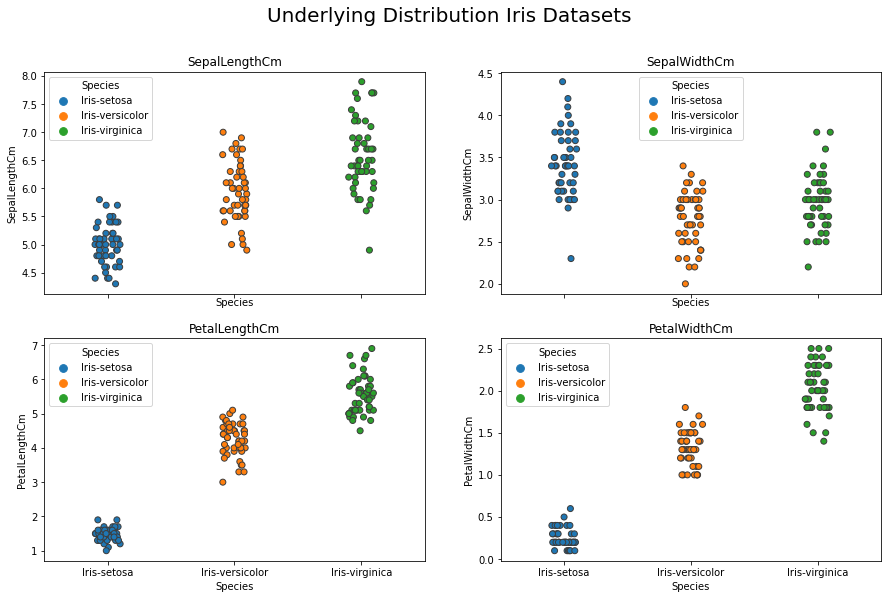

In [7]:
fig, axes = plt.subplots(2, 2 ,sharex=True, figsize=(15,9))
fig.suptitle('Underlying Distribution Iris Datasets', fontsize=20)

axes[0][0].set_title('SepalLengthCm')
sns.stripplot(ax=axes[0, 0], x="Species", y="SepalLengthCm",hue= "Species" , data=df, linewidth=1, size=6)

axes[0][1].set_title('SepalWidthCm')
sns.stripplot(ax=axes[0, 1], x="Species", y="SepalWidthCm",hue= "Species" , data=df, linewidth=1, size=6)

axes[1][0].set_title('PetalLengthCm')
sns.stripplot(ax=axes[1, 0], x="Species", y="PetalLengthCm", hue= "Species" , data=df, linewidth=1, size=6)

axes[1][1].set_title('PetalWidthCm')
sns.stripplot(ax=axes[1, 1], x="Species", y="PetalWidthCm", hue= "Species" , data=df, linewidth=1, size=6)

# plt.savefig("iris_stripplot.png")

In [8]:
# fig, axes = plt.subplots(1, 2 ,sharex=True, figsize=(10,10))
# sns.jointplot(ax =axes[0], data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
# sns.jointplot(ax =axes[1], data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

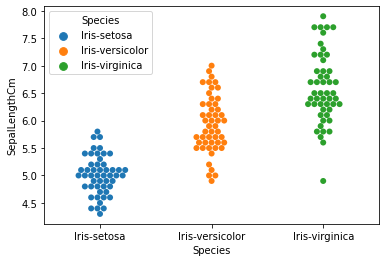

In [9]:
sns.swarmplot(x="Species", y="SepalLengthCm", data=df, hue="Species",size=6)

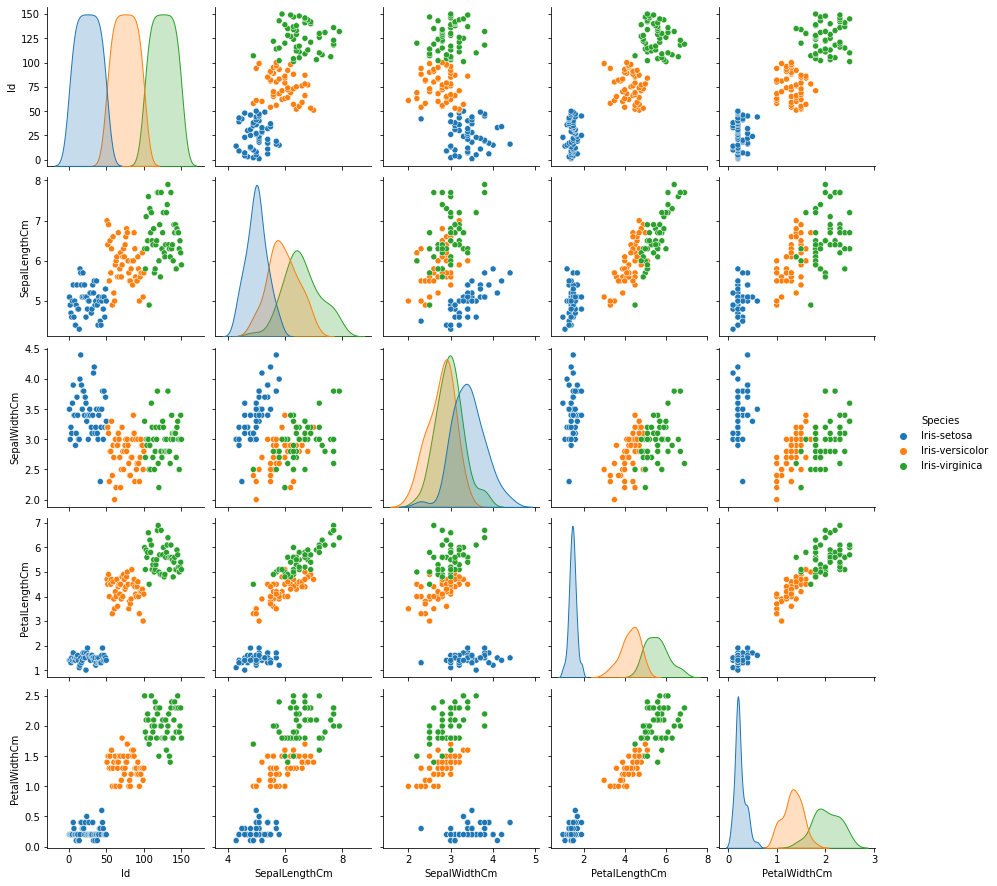

In [10]:
sns.pairplot(df, hue='Species')

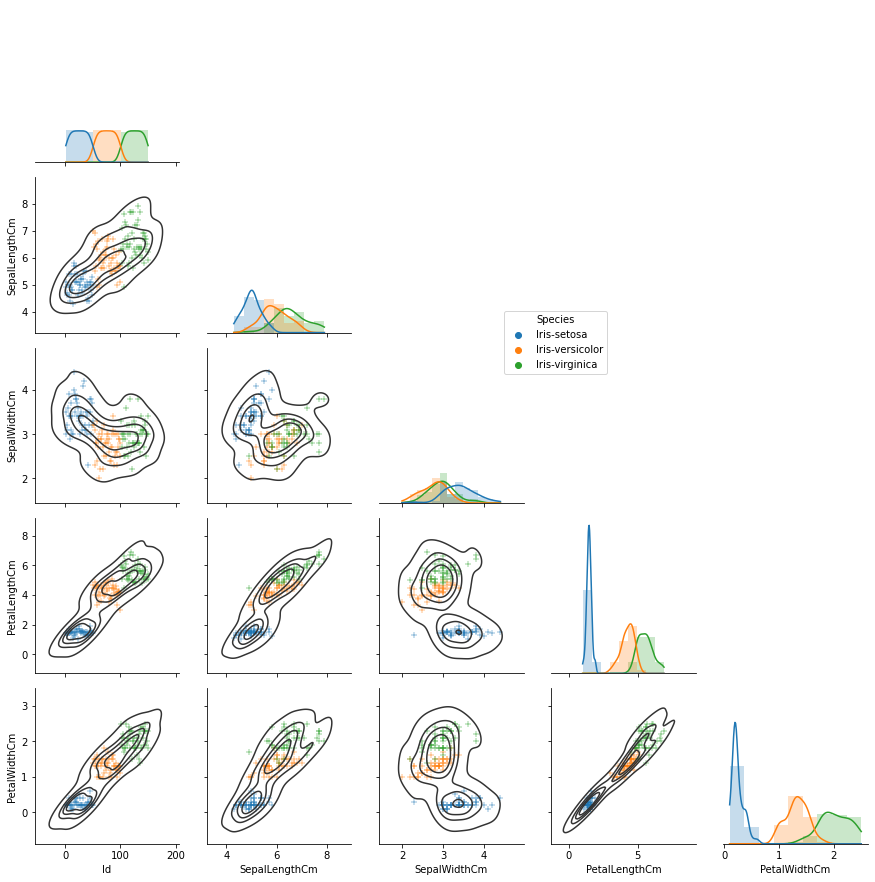

In [11]:
g = sns.PairGrid(df, hue="Species", corner=True)                ### advanced plots 
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [12]:
import plotly.express as px
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='Species', 
                        opacity=1, 
                        # animation_frame = "Species", 
                        # range_x = [4, 8],range_y = [1.5,5],range_z = [1.5,10]
                        
                        )
fig.show()
# fig.write_html("iris_3d_plot1.html")

In [13]:
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm', color='Species')
fig.show()
# fig.write_html("C:/Users/ashwini.pramodrao/OneDrive - Veoneer/Documents/ML_Community/Logistic Regression/iris_3d_plot2.html")


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=2)         ### # Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()             ### Feature Scaling , Standardize the data (mean=0, std=1) 
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test) 


In [16]:
clf = LogisticRegression(random_state=0,solver='sag', multi_class='auto',verbose=True,max_iter=100, C=1.0, penalty= "l2")

clf.fit(X_train,Y_train)                 #### Fitting Logistic Regression to the Training set

convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(random_state=0, solver='sag', verbose=True)

In [17]:
classList = clf.classes_                ### A list of class labels known to the classifier,shape of (n_classes, )
classList


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
weights = clf.coef_                 ### Coefficient of the features, shape of (n_classes, n_features)
weights

array([[-1.12819151, -0.8112504 ,  1.09121593, -1.41680904, -1.34264519],
       [-0.94527336,  0.35164182, -0.55401038,  0.11919466, -0.3199567 ],
       [ 2.07346487,  0.45960858, -0.53720556,  1.29761439,  1.66260189]])

In [19]:
intercept = clf.intercept_      ### Intercept (a.k.a. bias) ,shape of (n_classes,)
intercept


array([-0.59594198,  1.95946284, -1.36352086])

In [20]:
iteration = clf.n_iter_           ###Actual number of iterations for all classes
iteration

array([23])

In [21]:
y_pred = clf.predict(X_test)        # Predicting the Test set results
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [22]:
probs_y = clf.predict_proba(X_test)         # Predict probabilities
probs_y

array([[9.87345227e-01, 1.26547303e-02, 4.29056453e-08],
       [9.64419540e-01, 3.55803801e-02, 7.93821727e-08],
       [1.76719135e-04, 1.22096869e-01, 8.77726412e-01],
       [9.44098049e-01, 5.59017792e-02, 1.72200859e-07],
       [9.75558207e-01, 2.44414686e-02, 3.24870609e-07],
       [4.91733212e-05, 5.72474877e-02, 9.42703339e-01],
       [8.97582214e-01, 1.02416581e-01, 1.20470065e-06],
       [3.31215206e-05, 1.45583330e-01, 8.54383549e-01],
       [1.70107359e-05, 2.18223743e-02, 9.78160615e-01],
       [9.17845455e-01, 8.21501871e-02, 4.35814619e-06],
       [9.87116161e-01, 1.28830780e-02, 7.61082371e-07],
       [9.81487838e-01, 1.85116167e-02, 5.45093083e-07],
       [9.61859857e-01, 3.81394481e-02, 6.95227880e-07],
       [9.90747813e-01, 9.25213437e-03, 5.29573395e-08],
       [6.03563061e-02, 7.41045596e-01, 1.98598098e-01],
       [4.93080293e-03, 9.69772620e-01, 2.52965766e-02],
       [5.84562625e-01, 4.15422829e-01, 1.45457823e-05],
       [2.94277035e-02, 8.07564

In [23]:
probs_y = np.round(probs_y, 2)      ### Print results,limiting probabilities to 2 decimal point   
probs_y

array([[0.99, 0.01, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.12, 0.88],
       [0.94, 0.06, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.06, 0.94],
       [0.9 , 0.1 , 0.  ],
       [0.  , 0.15, 0.85],
       [0.  , 0.02, 0.98],
       [0.92, 0.08, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.06, 0.74, 0.2 ],
       [0.  , 0.97, 0.03],
       [0.58, 0.42, 0.  ],
       [0.03, 0.81, 0.16],
       [0.  , 0.  , 1.  ],
       [0.01, 0.9 , 0.09],
       [0.  , 0.77, 0.23],
       [0.01, 0.94, 0.05],
       [0.  , 0.04, 0.96],
       [0.02, 0.84, 0.14],
       [0.  , 0.88, 0.12],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.08, 0.92],
       [0.99, 0.01, 0.  ],
       [0.  , 0.04, 0.96]])

In [24]:
res = "{:<15} | {:<15} | {:<15} | {:<13} | {:<5}".format("Y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")  
res += "-"*85+"\n"
res += "\n".join("{:<15} | {:<15} | {:15} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(Y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*85+"\n"
print(res)

Y_test          | y_pred          | Setosa(%)       | versicolor(%) | virginica(%)
-------------------------------------------------------------------------------------
Iris-setosa     | Iris-setosa     |            0.99 | 0.01          | 0.0       
Iris-setosa     | Iris-setosa     |            0.96 | 0.04          | 0.0       
Iris-virginica  | Iris-virginica  |             0.0 | 0.12          | 0.88      
Iris-setosa     | Iris-setosa     |            0.94 | 0.06          | 0.0       
Iris-setosa     | Iris-setosa     |            0.98 | 0.02          | 0.0       
Iris-virginica  | Iris-virginica  |             0.0 | 0.06          | 0.94      
Iris-setosa     | Iris-setosa     |             0.9 | 0.1           | 0.0       
Iris-virginica  | Iris-virginica  |             0.0 | 0.15          | 0.85      
Iris-virginica  | Iris-virginica  |             0.0 | 0.02          | 0.98      
Iris-setosa     | Iris-setosa     |            0.92 | 0.08          | 0.0       
Iris-setosa     | Iri

In [25]:
cm = confusion_matrix(Y_test, y_pred)           ### Confusion Matrix 
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]        ### Normalised Confusion Matrix  
cm_norm = np.around(cm_norm,decimals = 2)

[Text(0.5, 24.0, 'Predicted labels'),
 Text(570.5454545454544, 0.5, 'True labels')]

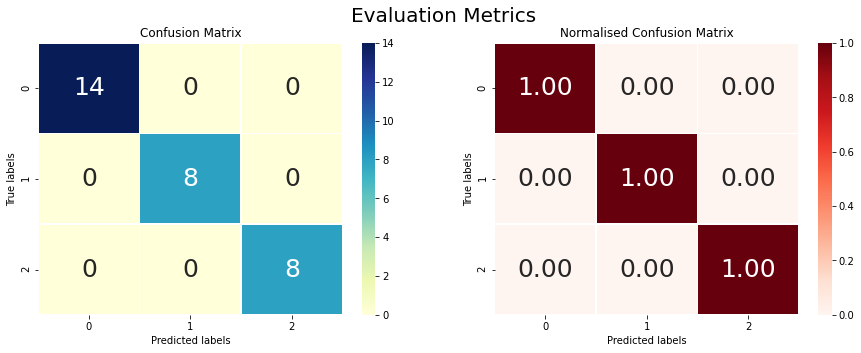

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2 ,sharex=True, figsize=(15,5))
fig.suptitle('Evaluation Metrics',fontsize=20)

ax1.set_title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt="d", cmap="YlGnBu", ax=ax1,linewidths=.5, annot_kws={"size": 25},cbar=True)     
ax1.set(xlabel='Predicted labels', ylabel='True labels')

ax2.set_title('Normalised Confusion Matrix')
sns.heatmap(cm_norm, annot=True,fmt=".2f", cmap="Reds", ax=ax2,linewidths=.5, annot_kws={"size": 25},cbar=True)     
ax2.set(xlabel='Predicted labels', ylabel='True labels')

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred)           ### Evaluate the predictions
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


In [28]:
from sklearn.metrics import classification_report
classList = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
clsReport = classification_report(Y_test, y_pred, target_names=classList)
print(clsReport)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [29]:
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier, plot_tree

# # Parameters
# n_classes = 3
# plot_colors = "ryb"
# plot_step = 0.02

# # Load data
# iris = load_iris()

# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
#                                 [1, 2], [1, 3], [2, 3]]):
#     # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

#     # Train
#     clf = LogisticRegression().fit(X, y)

#     # Plot the decision boundary
#     plt.subplot(2, 3, pairidx + 1)

#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
#                     cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

# plt.suptitle("Decision surface paired features")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
# plt.axis("tight")

# plt.show()